数据准备完成。
训练集大小: (455, 30)
测试集大小: (114, 30)


C:\Users\30353\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:38:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost模型训练完成。

SHAP值计算完成。

正在生成全局特征重要性图 (Bar)...


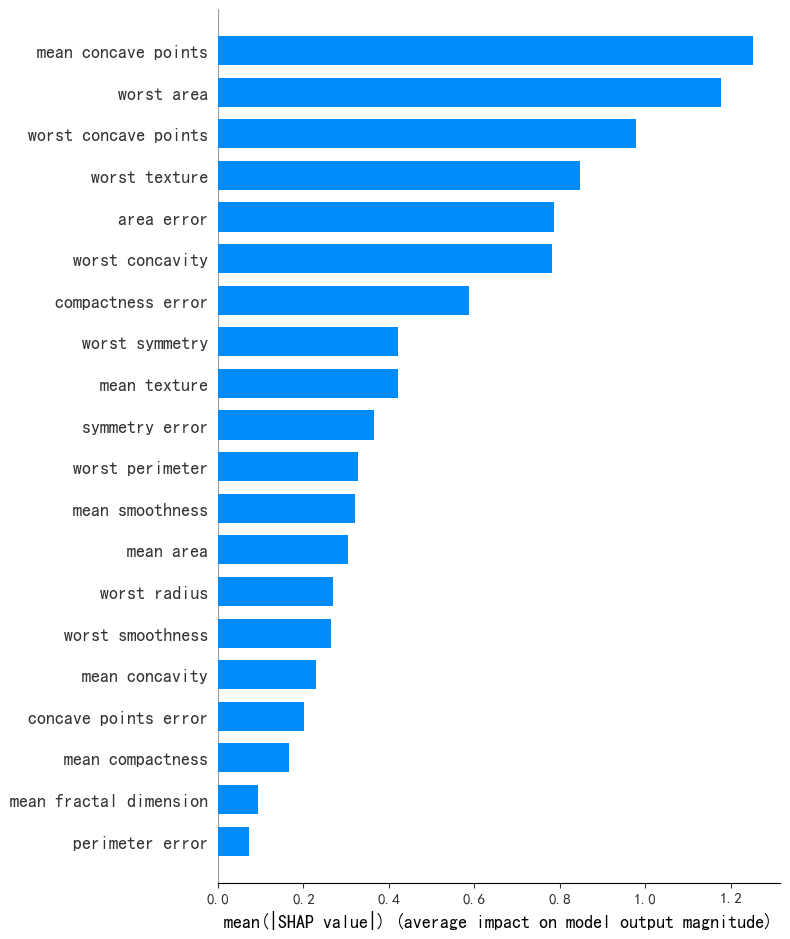


正在生成特征影响分布图 (Bee Swarm)...


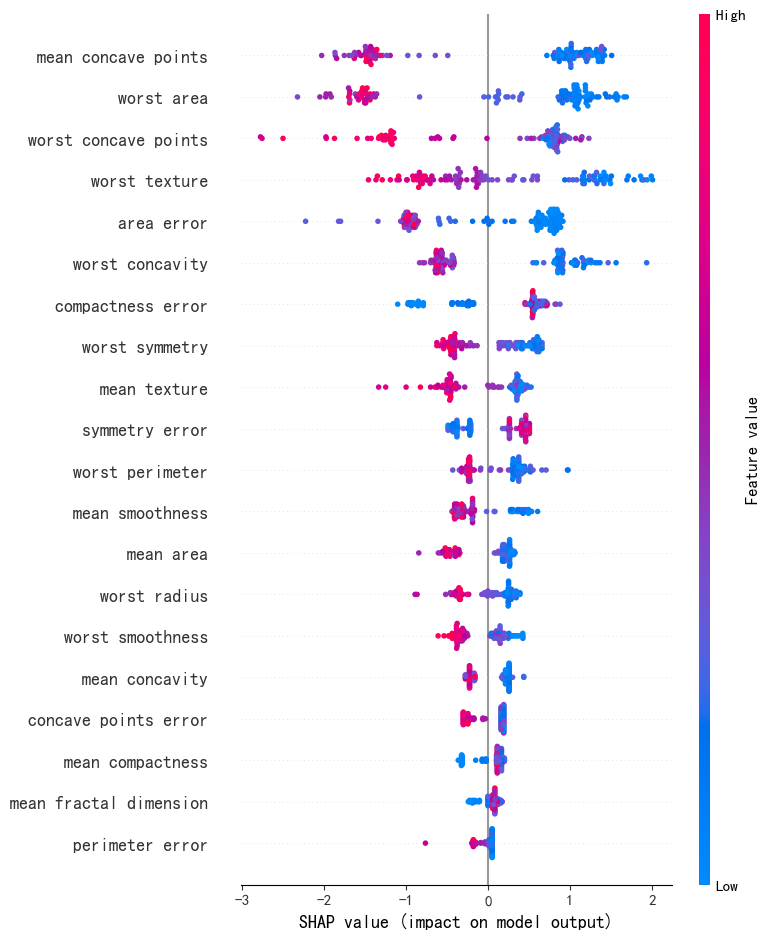


正在生成单个预测的解释图 (Force Plot)...


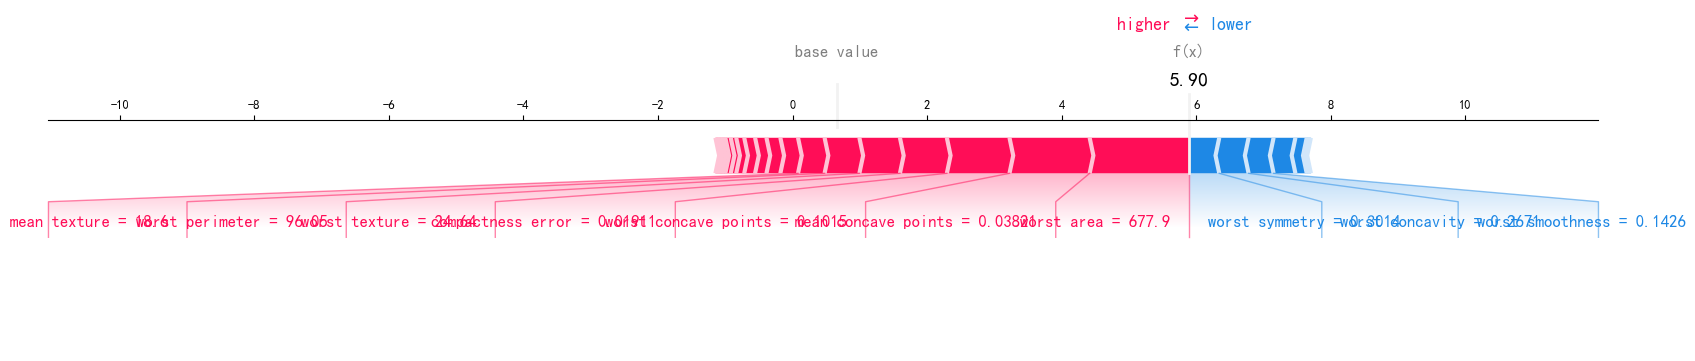


正在生成特征依赖图 (Dependence Plot)...


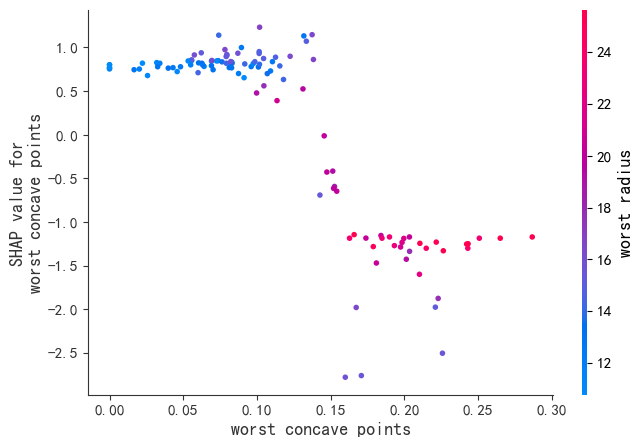


所有SHAP可视化完成。


In [ ]:
import pandas as pd
import xgboost
import shap
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# --- 步骤 1: 加载并准备数据 ---
# 加载Scikit-learn内置的乳腺癌数据集
dataset = load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target

# 将数据拆分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("数据准备完成。")
print(f"训练集大小: {X_train.shape}")
print(f"测试集大小: {X_test.shape}")


# --- 步骤 2: 训练机器学习模型 ---
# 我们使用XGBoost分类器，因为它性能强大且被SHAP很好地支持
model = xgboost.XGBClassifier(eval_metric='logloss', use_label_encoder=False)
model.fit(X_train, y_train)

print("\nXGBoost模型训练完成。")


# --- 步骤 3: 使用SHAP进行模型解释 ---
# 创建一个SHAP解释器（Explainer）
# 对于树模型（如XGBoost, LightGBM, CatBoost），TreeExplainer是最高效的
explainer = shap.TreeExplainer(model)

# 计算测试集所有样本的SHAP值
# 这会返回一个和X_test同样大小的数组，每个值代表对应特征对预测的贡献
shap_values = explainer.shap_values(X_test)

print("\nSHAP值计算完成。")


# --- 步骤 4: SHAP可视化 ---
# SHAP的可视化是其核心亮点

# **可视化 1: 全局特征重要性 - Summary Plot (bar)**
# 这个图表展示了所有特征的平均SHAP绝对值，可以看作是比传统特征重要性更可靠的版本。
print("\n正在生成全局特征重要性图 (Bar)...")
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)


# **可视化 2: 特征影响分布 - Summary Plot (bee swarm)**
# 这是SHAP最有名的图之一。它不仅显示了特征的重要性，还显示了特征值的大小如何影响预测结果。
# - 每一行是一个特征，越靠上的特征越重要。
# - 每个点是一个样本。
# - 点的颜色代表特征值的大小（红色=高，蓝色=低）。
# - 点在x轴上的位置代表该特征对预测的贡献（正值=推高预测，负值=拉低预测）。
print("\n正在生成特征影响分布图 (Bee Swarm)...")
shap.summary_plot(shap_values, X_test, show=True)


# **可视化 3: 单个预测解释 - Force Plot**
# 这个图解释了为什么模型对单个样本做出了特定的预测。
# - `explainer.expected_value` 是模型的基准值（所有预测的平均值）。
# - 红色的特征是把预测推向更高值的“推手”。
# - 蓝色的特征是把预测拉向更低值的“拉手”。
# - 箭头的长度代表特征贡献的大小。
print("\n正在生成单个预测的解释图 (Force Plot)...")
# 为了在Jupyter Notebook/Lab中显示，需要初始化JS
shap.initjs() 
# 解释测试集中的第一个样本
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True, show=True)


# **可视化 4: 特征依赖图 - Dependence Plot**
# 这个图展示了单个特征的值如何影响其对模型的贡献（SHAP值）。
# 它可以帮助我们理解特征和预测之间的非线性关系。
# - x轴是特征的值。
# - y轴是该特征的SHAP值。
# - 垂直方向的颜色散布显示了与另一个特征的交互效应。
print("\n正在生成特征依赖图 (Dependence Plot)...")
# 我们选择最重要的特征 "worst concave points" 来进行分析
shap.dependence_plot("worst concave points", shap_values, X_test, interaction_index="worst radius", show=True)

print("\n所有SHAP可视化完成。")